# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the examples folder.

In [56]:

import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self,learning_rate,epochs):
        self.lr=learning_rate
        self.epochs=epochs
    
    def fit(self,x_train,y_train):
    
        n_samples, n_features = x_train.shape
        y_train=y_train.reshape(-1,1)
        self.weights = np.zeros((n_features,1))
        self.bias = np.zeros((1,1))

        for i in range(self.epochs):
            delta= -(y_train-np.dot(x_train,self.weights)-self.bias)/n_samples
            dw= np.dot(x_train.T,delta)
            db= np.sum(delta).reshape(1,1)

            self.weights-= self.lr * dw
            self.bias-= self.lr* db
    
    def predict(self, x_test):
        y_pred = np.dot(x_test,self.weights)+self.bias
        print(self.weights, self.bias)
        return y_pred     
        
        

## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

In [5]:
import pandas as pd

df=pd.read_csv('Real_estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [14]:
target=df['Y house price of unit area']
df_new=df.drop(columns=['No','Y house price of unit area'])

In [15]:
x=np.array(df_new)
y=np.array(target)

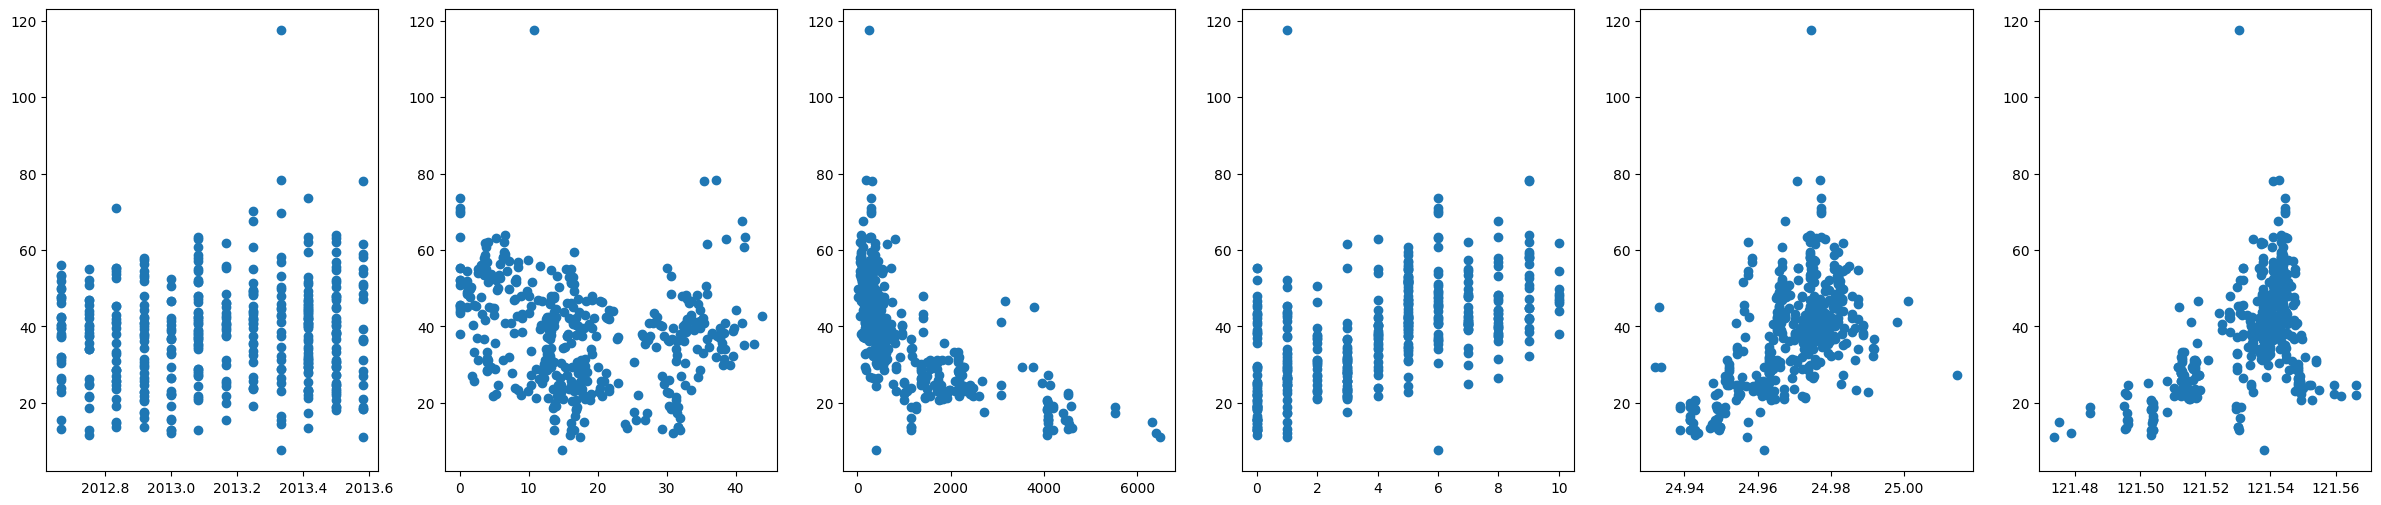

In [19]:
fig,axis=plt.subplots(1,6,figsize=(30,6))

for i,ax in enumerate(axis):
    ax.scatter(x[:,[i]],y)
    

In [22]:
df_new.drop(columns=['X1 transaction date'],inplace=True)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x=np.array(df_new)
y=np.array(target)

x_train,x_test,y_train,y_test=train_test_split=train_test_split(x,y,test_size=0.25)
x_train=MinMaxScaler().fit_transform(x_train)
y_train=MinMaxScaler().fit_transform(y_train.reshape(-1,1))
x_test=MinMaxScaler().fit_transform(x_test)
y_test=MinMaxScaler().fit_transform(y_test.reshape(-1,1))

In [40]:
y_test=y_test.flatten()
y_train=y_train.flatten()

In [58]:
model=LinearRegression(0.1,10)
model.fit(x_train,y_train)

In [49]:
y_pred=model.predict(x_test)

[[0.03903319]
 [0.00631076]
 [0.06362096]
 [0.07281587]
 [0.08472109]] [[0.11815472]]


In [50]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=y_test,y_pred=y_pred)

0.04610772484855248

In [53]:
from sklearn.linear_model import LinearRegression
modell=LinearRegression()

modell.fit(x_train,y_train)
y_pred=modell.predict(x_test)
mean_squared_error(y_true=y_test,y_pred=y_pred)

0.03456413947600715

In [69]:
model=LinearRegression(0.09,100)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=y_test,y_pred=y_pred)

[[-0.02496086]
 [-0.05047712]
 [ 0.11661397]
 [ 0.11289755]
 [ 0.11235817]] [[0.1162102]]


0.03426171812854637

# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

5. Write code for the sigmoid function and Logistic regression.


In [79]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
x=load_breast_cancer().data
y=load_breast_cancer().target

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25)


In [90]:
def sigmoid(z):
   return 1/(1+np.exp(-z))

def sigmoid_derivative(z):
    s=sigmoid(z)
    return s*(1-s)

class LogisticRegression:
    def __init__(self, learning_rate, epochs):
      #Initialise the hyperparameters of the model
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = np.random.randn(n_features,1)/np.sqrt(n_features)
        self.bias = np.random.randn(1,1)

        #Implement the GD algortihm
        for i in range(self.epochs):
            z = np.dot(X,self.weights)+self.bias
            y_pred = sigmoid(z)

            dw =-np.dot(X.T,(y-y_pred))/n_samples
            db =-np.sum(y-y_pred)/n_samples

            self.weights -= self.lr*dw
            self.bias -= self.lr*db

    def predict(self, X):
      #Write the predict function
        y_pred=np.dot(X,self.weights)+self.bias

        for i in range(len(y_pred)):
            if y_pred[i]<=0.5:
                y_pred[i]=0
            else:
                y_pred[i]=1   
        return y_pred

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [91]:
model=LogisticRegression(0.1,10)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print("mera model ",mean_squared_error(y_test,y_pred))

from sklearn.linear_model import LogisticRegression

modell=LogisticRegression()
modell.fit(x_train,y_train)
y_pred=modell.predict(x_test)

print(mean_squared_error(y_test,y_pred))

mera model  0.6573426573426573
0.027972027972027972


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.97      0.99      0.98        96

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143



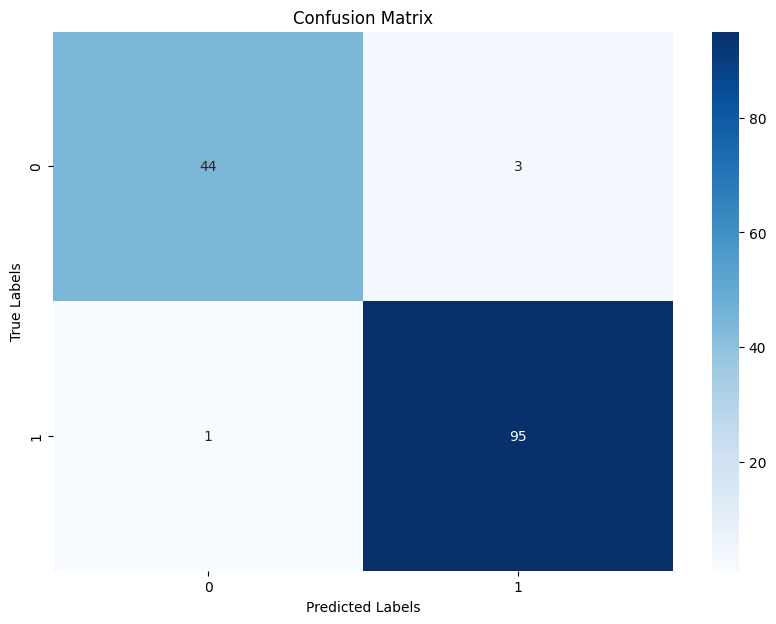

In [94]:
from sklearn.metrics import classification_report,confusion_matrix

report=classification_report(y_test,y_pred)
print(report)

cm=confusion_matrix(y_test,y_pred)

import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [95]:
df=pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [96]:
target=df['Type']
df.drop(columns=['Type'],inplace=True)


In [105]:
x=np.array(df)
y=np.array(target)

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [109]:
import numpy as np
from collections import Counter

In [110]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN(object):
    def __init__(self,k):
        self.k=k
    def fit(self,x_train,y_train):
        self.x_train=x_train
        self.y_train=y_train
    def predict(self,x_test):
        predictions=[self._helper(x) for x in x_test]
        return np.array(predictions)
    def _helper(self,x):
        prediction=[euclidean_distance(x,x1) for x1 in self.x_train]
        indices= np.argsort(prediction)[:self.k]
        labels= [self.y_train[i] for i in indices]
        c=Counter(labels).most_common()
        return c[0][0]
        

7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [107]:
x_train

array([[ 1.51778, 13.21   ,  2.81   , ...,  9.02   ,  0.     ,  0.09   ],
       [ 1.5159 , 13.24   ,  3.34   , ...,  8.22   ,  0.     ,  0.     ],
       [ 1.51756, 13.15   ,  3.61   , ...,  8.24   ,  0.     ,  0.     ],
       ...,
       [ 1.51708, 13.72   ,  3.68   , ...,  7.88   ,  0.     ,  0.     ],
       [ 1.51666, 12.86   ,  0.     , ..., 10.17   ,  0.     ,  0.     ],
       [ 1.51811, 13.33   ,  3.85   , ...,  8.12   ,  0.     ,  0.     ]])

In [117]:
from sklearn.metrics import accuracy_score
model=KNN(k=1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_pred,y_test))
     

0.7592592592592593


In [119]:
from sklearn.neighbors import KNeighborsClassifier
modell=KNeighborsClassifier(n_neighbors=1)
modell.fit(x_train,y_train)
y_pred=modell.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.7592592592592593
